In [67]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn import metrics
import seaborn as sns

1.0    642
0.0    182
Name: Married, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Married
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0,1.0


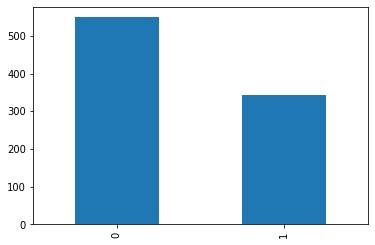

In [68]:
df = pd.read_csv("train.csv")
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Survived"].value_counts().plot.bar()
df["Fare"].fillna(df["Fare"].mean(), inplace=True)
# mapping features to numerical values
d1 = {"female": 0, "male": 1}
d2 = {"S": 0, "C": 1, "Q": 2}

# data resampling ?
df["Sex"] = df["Sex"].map(d1)
df["Embarked"] = df["Embarked"].map(d2)
#df.head()


mapping = {"Mr": 1, "Miss": 0, "Mrs": 1}
df["Married"] = df["Name"].str.extract("([A-Za-z]+)\.")
df["Married"] = df["Married"].map(mapping)
print(df["Married"].value_counts())
for i in range(len(df["Married"])):             # extracting married column from their names. Thanks to Jicheng Li
    if type(df["Married"][i]) == str:
        df["Married"][i] = 1                    # filling missing values with most common label?
df.head()

In [69]:
extracted = df.drop(columns="PassengerId", axis=1).drop(columns="Name", axis=1).drop(columns="Cabin", axis=1).drop(columns="Ticket")
# find a way to deal with missing values: cut them off or take average value from its neighbors
extracted = extracted.dropna()
X = extracted.drop(columns="Survived", axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Married
0,3,1,22.000000,1,0,7.2500,0.0,1.0
1,1,0,38.000000,1,0,71.2833,1.0,1.0
2,3,0,26.000000,0,0,7.9250,0.0,0.0
3,1,0,35.000000,1,0,53.1000,0.0,1.0
4,3,1,35.000000,0,0,8.0500,0.0,1.0
...,...,...,...,...,...,...,...,...
885,3,0,39.000000,0,5,29.1250,2.0,1.0
887,1,0,19.000000,0,0,30.0000,0.0,0.0
888,3,0,29.699118,1,2,23.4500,0.0,0.0
889,1,1,26.000000,0,0,30.0000,1.0,1.0


In [70]:
Y = extracted["Survived"]
Y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 822, dtype: int64

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.6)

# rescale data in trainnig stage (decrease sensitivity of the model)
sc = StandardScaler()
scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)


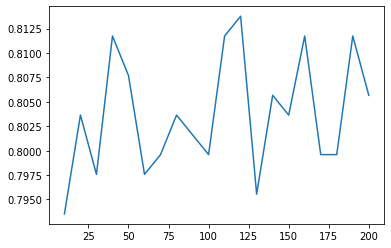

In [72]:
scores = []
ns = [i for i in range(10, 201, 10)]
for i in ns:
    rf = RandomForestClassifier(n_estimators=i, criterion="entropy")
    rf.fit(X_train, Y_train)
    #rf.fit(testX_scaled, Y_test)
    scores.append(accuracy_score(Y_test, rf.predict(X_test)))
    #y_pred = rf.predict(X_test)
    ''' plt.plot(Y_test, label="expected")
    plt.plot(y_pred, label="predicted")
    plt.legend()
    print("n = " + str(i))
    print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
    '''

plt.plot(ns, scores)
    

In [76]:
rf = RandomForestClassifier(n_estimators=110, criterion="entropy")
rf.fit(X_train, Y_train)
accuracy_score(Y_test, rf.predict(X_test))

0.8036437246963563